<a href="https://colab.research.google.com/github/KrisSandy/ExMachineLearning/blob/master/ML_Classification_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning | Classification | K Nearest Neighbors
Author: SandyBoy

## Why scikit-learn

There are many open source Machine learning packages available in the market. TensorFlow, SciKit-learn, Caffe are few to name. For this task I have chosen scikit-learn library which is an open source package developed in python. scikit-learn along with other scientific packages in python (pandas, numpy etc) provides powerful data processing and machine learning tools which can be leveraged with ease.

Besides readily available implementation of K Nearest Neighbors algorithm, below are some of the main reasons for choosing scikit-learn


*   scikit-learn is open source package implemented in python.
*   Its regularly updated with more than 1 release per year which means the packages are up to date.
* Easy to use 
* It has implementations for most of the machine learning tasks such as Clustering, Classification, Regression etc.
* Very good and up to date documentation available.

Beow are some of the features of scikit learn:

*  Powerful functions for data pre processing, transformations and data normalization.
*  Functions to perform many of the Classification, Regression, Clustering algorithms. All the algorithms follow same design principles, so it is easy to adopt and use different machine learning algorithms. 
* Provides powerful functions for Dimensionality reduction 


*Reference: https://www.oreilly.com/ideas/six-reasons-why-i-recommend-scikit-learn*


## Data Pre-processing

Below are the steps followed for getting the data in to the format used by scikit learn:

* Data in the dataset is separated by tab. Each row represents an attribute and columns represent each individual patients. 

* In order to load the data into pandas dataframe, the file is read using read_csv using the separator as tab ('\t'). A transpose of the dataframe is required to bring the data into traditional format i.e. features in columns and observations (patients) in rows. 

* After getting the data in desired format, column names are added to give more sense and completeness to the dataframe.

* Data and Response used to train and test the models should be in numbers as numpy arrays. So Autoimmune_Disease column needs to be converted to 0 and 1 representing negative and positive respectively. 

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy
fields = ['Age', 'Blood_Pressure', 'BMI', 'Plasma_level', 'Autoimmune_Disease', 
          'Adverse_events', 'Drug_in_serum', 'Liver_function', 'Activity_test',
          'Secondary_test']
autoimmune_data = pd.read_csv(r'/content/gdrive/My Drive/GYE06/CT475_ML/autoimmune.txt',
                 sep='\t',
                 header=None
                )
autoimmune_data = autoimmune_data.transpose()
autoimmune_data.columns = fields
autoimmune_data['Autoimmune_Disease'] = autoimmune_data['Autoimmune_Disease'] \
.map({'negative':0, 'positive':1})

## Model Construction

k Nearest Neighbors algorithm is an instance based learning algorithm used for classification. This algorithm predicts the outcome by calculating the distance from the query point to all the data points.  It then takes the k nearest data points and classifies the query point as the category with higest number in the k data points. Distance can be measured either as Euclidean, or Cosign, or Manhattan or Hamming distance. 

Scikit-learn's KNeighborsClassifier has been used for implementing k Nearest Neighbors algorithm. The default distance measurement for kNN algorithm in scikitlearn is 'minkowski'. This can be changed to euclidean distance by using metrics parameter.


#### Normalizing data

When the attributes in the data have wide range of values, attributes with large number range will have more impact during the distance calculation than attributes with smaller number range. Hence data must be normalized. We will be using z normalization, which means data will be scaled in such a way that mean of an attribute is zero and standard deviation is 1


In [10]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = autoimmune_data.drop(columns = ['Autoimmune_Disease'])
y = autoimmune_data['Autoimmune_Disease']
X_scaled = preprocessing.scale(X)
X_scaled.mean(axis=0) # axis=0 indicated that mean should be taken wrt col
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 99)
print(X_train.shape)
print(X_test.shape)

(282, 9)
(94, 9)


#### Implementing kNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

autoimmune_knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
autoimmune_knn.fit(X_train, y_train)
accuracy_knn = autoimmune_knn.score(X_test, y_test)
print("The accuracy of the model using k=5 is {}".format(accuracy_knn))

The accuracy of the model using k=5 is 0.7553191489361702


## Model Evaluation


### 10-fold cross Validation

k fold cross validation is a technique used to find the accuracy of the model. In this technique the dataset is divided into k folds. The training of the model is done using k-1 folds and 1 fold is used for testing the model. This process is repeated k-1 times and changing the testing fold in each iteration. The accuracy of the model is calculated for each iteration and the mean of all the accuracies are taken to get the model accuracy.


scikit-learn provides a inbuit function which performs the k fold validatio given k. The code is as below

In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNeighborsClassifier(n_neighbors=7), X_train, y_train, cv=10)
print("Mean of 10-fold cross validation scores : {}".format(scores.mean()))

Mean of 10-fold cross validation scores : 0.7485312899106001


#### Finding optimal values of k

In the above model, n_neigbors has been set to 5, but this may not give high accuracy. In order to find out the optimum value of k, use GridSearchCv of scikit-learn

GridSearchCV will run the model (kNN in this case) with give range of parameters and gives the resulting accuracy scores.


In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(n_neighbors=range(1, 20))
knn = GridSearchCV(KNeighborsClassifier(n_neighbors=1), param_grid, cv=10)
knn.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

Text(0,0.5,'score')

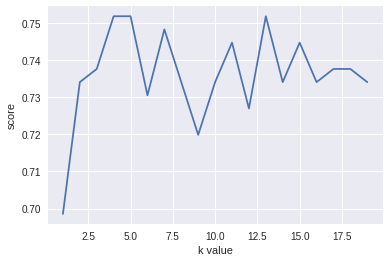

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, 20), knn.cv_results_['mean_test_score'])
plt.xlabel('k value')
plt.ylabel('score')

In [15]:
print("Best Score for normalised data : {} for {}".format(knn.best_score_, knn.best_params_))

Best Score for normalised data : 0.75177304964539 for {'n_neighbors': 4}


### Confusion Matrix

Confusion matrix is one of the methods used to measure the performance of the model with 2 or
more classes. Its basically a table of counts between actual and predicted. 



In [0]:
autoimmune_knn = KNeighborsClassifier(knn.best_estimator_.n_neighbors)
autoimmune_knn.fit(X_train, y_train)
y_predict_knn = autoimmune_knn.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix_knn = confusion_matrix(y_test, y_predict_knn)
tn, fp, fn, tp = confusion_matrix_knn.ravel()
print(confusion_matrix_knn)

[[59  3]
 [23  9]]


### ROC Curves and AUROC

From the above confusion matrix, we can derive below

**Sensitivity, Recall, True positive rate, Hit Rate : **

$TPR = TP/(TP+FN)$

**Specificity, Selectivity, True Negative Rate :**

$TNR = TN/(TN+FP)$

**Precision: **

$ Precision = TP / (TP+FP)$

**Fall-out or False Positive Rate : **

$FPR = FP/(FP+TN)$ i.e. $1-Specificity$ 

**Accuracy : **

$ Accuracy = TP + TN / (Total)$


ROC curves are plotted with FPR in the x-axis and TPR in the y-axis. For a binary classification model,
number of true positives and true negatives can be varied but adjusting the threshold of the
classifier. For example in logistic regression this threshold is set to 0.5 by default and
If
P(X) > 0.5 then y = 1,
P(X) <= 0.5 then y = 0.
To plot the ROC curve this threshold is changed in steps and various observations for TPR and FPR
are taken at each step. Finally all the observations are
plotted.
Classification performance can be measured using ‘Area
Under ROC curve’ and it varies from 0 to 1. When the
classifier predicts everything incorrectly, AUC will be equal
to zero and ROC curve will be the line in orange. When the
classifier predicts everything correctly, AUC will be equal to
1 and the ROC curve will be the line in red. If AUC is 0.5 the
graph will be along the line of equality which indicate a
random classifier. As the AUC increases the curve will be
closer to upper left hand corner.

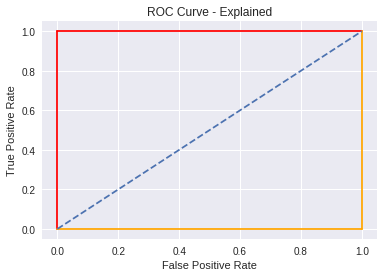

In [18]:
import matplotlib.pyplot as plt
plt.plot([0,0], [1, 0], [1, 1], color="red")
plt.plot([1,1], [0, 1], [0, 0], color="orange")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Explained")
plt.show()

In [0]:
def plot_roc(fpr, tpr, auroc, title):
  plt.plot(fpr, tpr)
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve - {}".format(title))
  plt.figtext(0.7, 0.2, "AUROC = {:.2f}".format(auroc), fontweight="bold")
  return plt

#### ROC and AUROC for KNN

(array([40.,  0., 22.,  0.,  0., 20.,  0., 10.,  0.,  2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

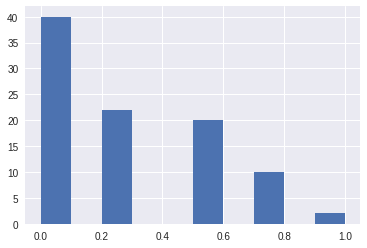

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
y_predict_prob_knn = autoimmune_knn.predict_proba(X_test)[:, 1]
plt.hist(y_predict_prob_knn)

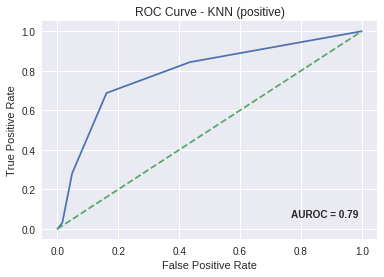

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_predict_prob_knn)
auroc = roc_auc_score(y_test, y_predict_prob_knn)
plot_roc(fpr, tpr, auroc , "KNN (positive)").show()

#### Observations
1. Area Under ROC is the area under the blue line in the above graphs. From the two ROC
curves, AUC of KNN model is 0.80 and AUC of Logistic Regression model is 0.82. This can be
an indication that Logistic regression model is performing better compared to KNN in this
case. As I have used only one test set for plotting the ROC curve and haven’t considered the
variance of the accuracies, it cannot conclude that Logistic regression model is performing
better than KNN model. Also as we have used only one test set, we need to consider the
variance in the every TPR and FPR which makes it difficult to conclude which mode is better.

2. As the ROC curve is plotted between sensitivity and (1-specificity), the observations close to
point (0,0), i.e. left side of the ROC curve (below 0.2 on x-axis) gives a model which fails to
predict most of the true positives, but the model preforms better in predicting the true
negatives. This threshold can be set for the models for which missing a true positive
prediction is fine compared to predicting a false positive predictions.

3. The right extreme of the ROC curve (above 0.8 on x-axis) gives a model which fails to predict
the true negatives, but the model performs better in predicting the true positives. This
threshold can be set to models for which identifying a true positive is critical than mis-
classifying negatives.

### Learning Curves

Learning curves are plotted between Training scores and Cross Validation scores with respect to sample size. This gives an indication of how the training and testing scores are varying with respect to the size of the training set. It can be used to decide whether collecting more data improves the performance of the classifier.

In [0]:
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(model, X, y):
  
  train_sizes = np.linspace(.1, 1.0, 15)
  cv = 10
  train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, train_sizes=train_sizes)
  
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std  = np.std(train_scores, axis=1)
  test_scores_mean  = np.mean(test_scores, axis=1)
  test_scores_std   = np.std(test_scores, axis=1)
  
  plt.plot(train_sizes, train_scores_mean, marker='o', color="r",label="Training score")
  plt.plot(train_sizes, test_scores_mean, marker='o', color="g",label="Cross-validation score")
  plt.legend(loc="best")
  plt.xlabel("Training Size")
  plt.ylabel("Score")
  
  return plt

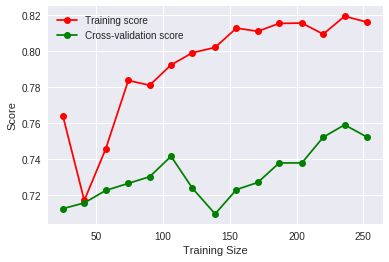

In [23]:
plot_learning_curve(autoimmune_knn, X_train, y_train)
plt.show()

#### Observations
from the learning curve its evident that the scores of training and cross validation set has not yet converged, and hence getting more data might help im improving the performance of the classifier.

####References 



*   *http://scikit-learn.org/stable/index.html*
*  *https://www.dataschool.io/machine-learning-with-scikit-learn/*
* *ROC Curves: https://en.wikipedia.org/wiki/Receiver_operating_characteristic*
* *http://www.blogspot.udec.ugto.saedsayad.com/docs/ROC101.pdf*
* *Confusion Matric: https://en.wikipedia.org/wiki/Confusion_matrix*
* *Sklearn ROC curves: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html*
* *Sklearn Confusion Matrix: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html*


